In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
k_n = 'k3'

stacking_strategies = [
    "igcngru_features",
    "idarkvec",
    "features"]

In [3]:
labels = [
    "censys",
    "driftnet",
    "internetcensus",
    "intrinsec",
    "ipip",
    "mirai",
    "onyphe",
    "rapid7",
    "securitytrails",
    "shadowserver",
    "shodan",
    "u_mich",
    "unk_bruteforcer",
    "unk_exploiter",
    "unk_spammer",
    "unknown",
]

labels.sort()

In [4]:
strats_posfix = '-'.join(sorted(stacking_strategies))

In [5]:
with open(f"../data/2022/output/reports/stacking-v-0.4-us/{strats_posfix}/{k_n}.pkl", "rb") as fd:
    stacking_reporte = pickle.load(fd)

In [6]:
def plot_cm(y, preds, labels):
    cm = confusion_matrix(y, preds, labels=labels, normalize="true")
    # cm = np.trunc(1000 * cm) / 1000
    sns.set(font_scale=1.2)  # Adjust font scale for better visibility
    sns.heatmap(
        cm,
        annot=True,
        annot_kws={"size": 12},
        xticklabels=labels,
        yticklabels=labels,
        square=False,
    )


def get_y_preds(stacking_reporte, day):
    y, preds = [], []
    for fold in stacking_reporte[day]:
        y.append(stacking_reporte[day][fold]["y"])
        preds.append(stacking_reporte[day][fold]["preds"])

    y = np.hstack(y)
    preds = np.hstack(preds)

    return y, preds

Text(0.5, 1.0, 'Day: 20221021')

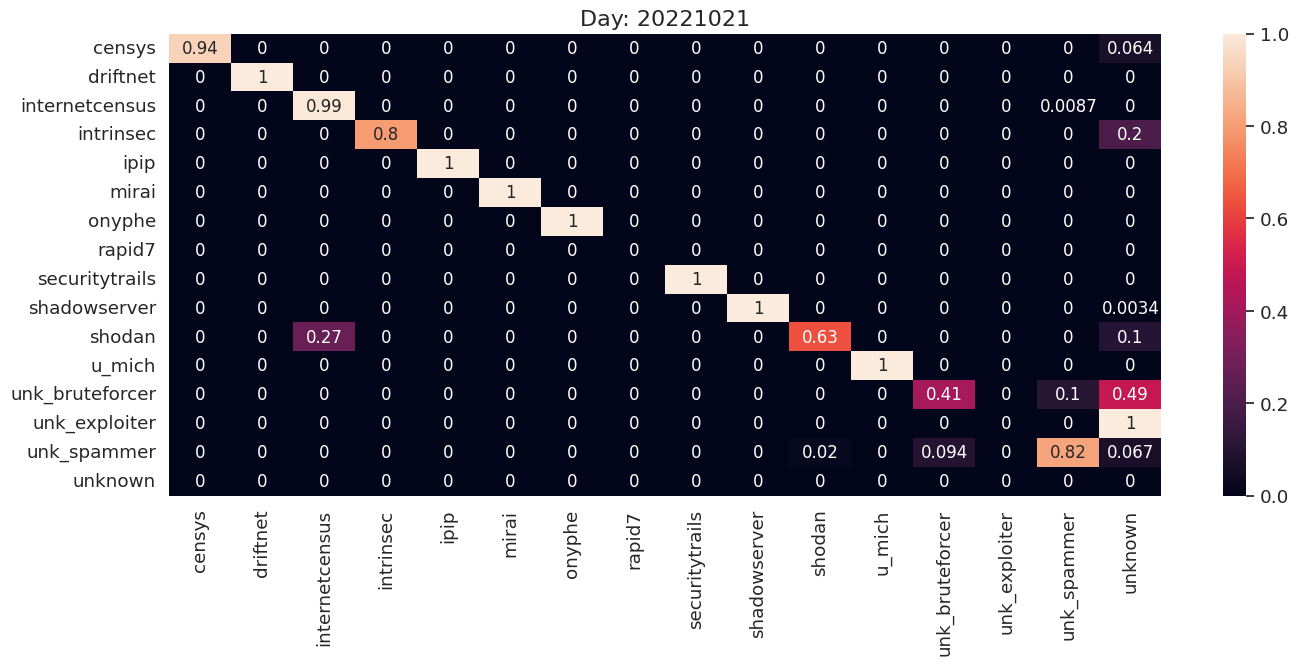

In [7]:
plt.figure(figsize=(16, 6))
day = "20221021"
y, preds = get_y_preds(stacking_reporte, day)
plot_cm(y, preds, labels)
plt.title(f"Day: {day}", fontsize=16)

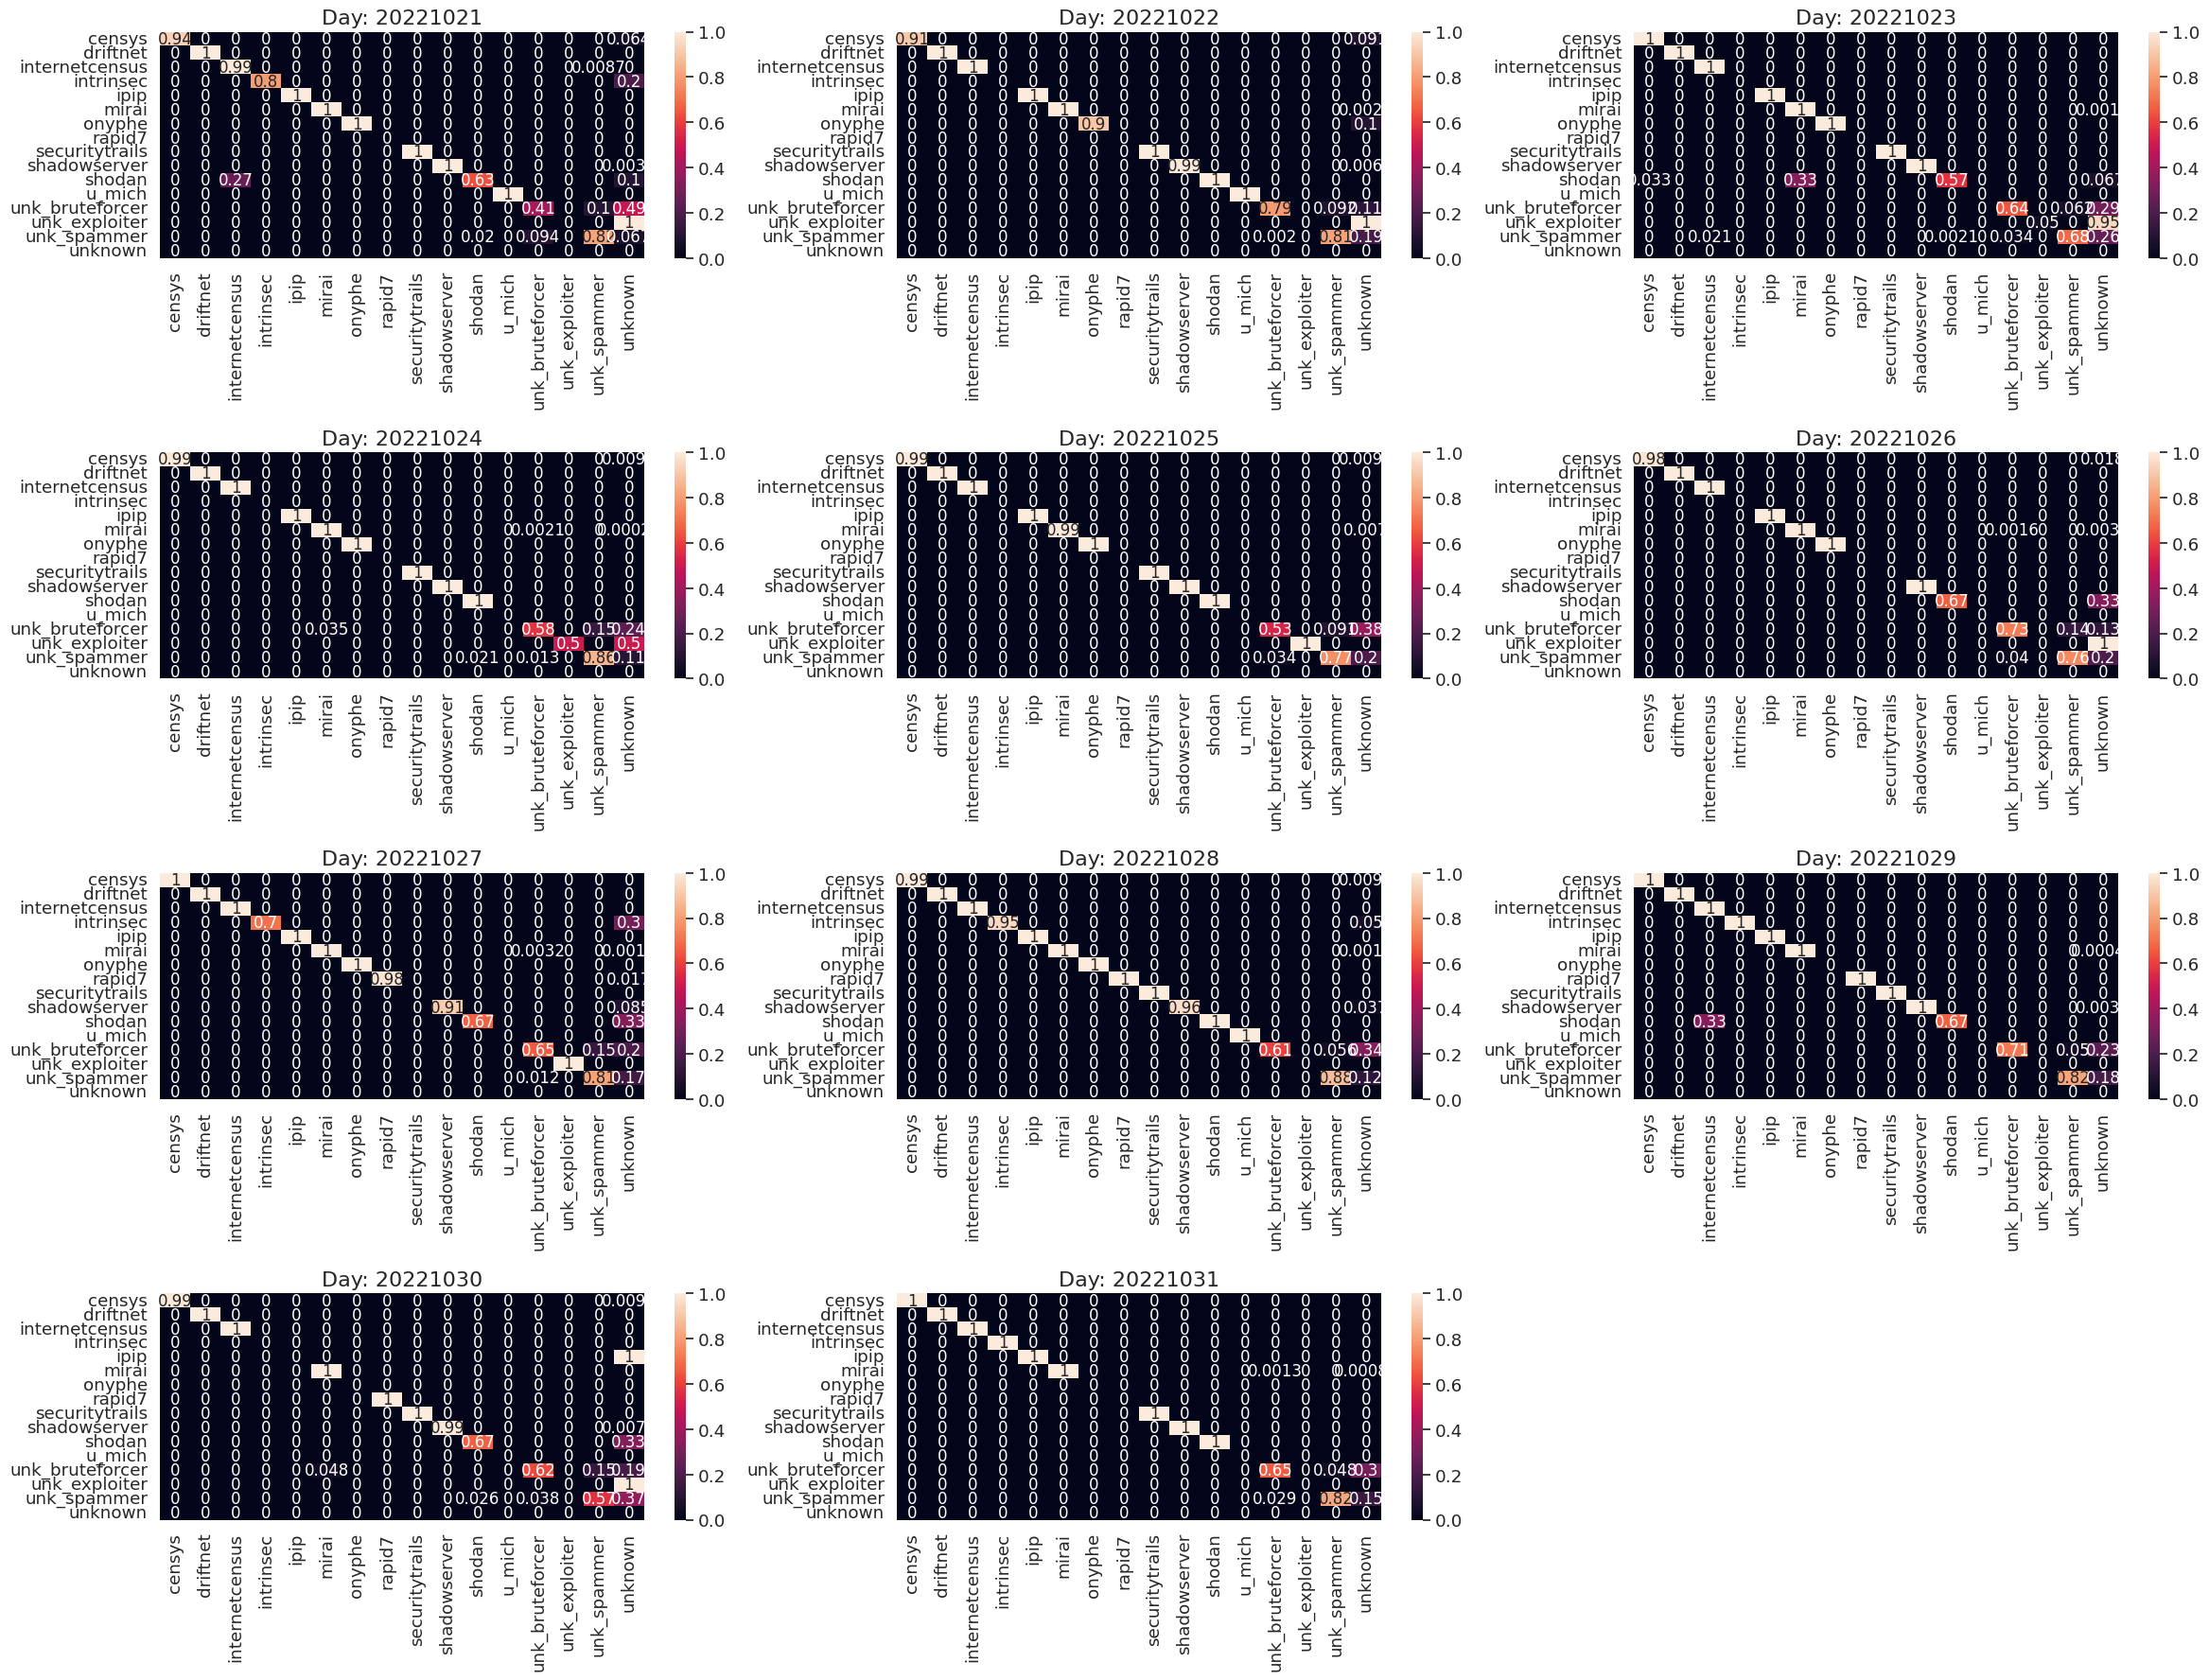

In [8]:
plt.figure(figsize=(24, 18))
for plot_idx, day in enumerate(stacking_reporte):
    
    y, preds = get_y_preds(stacking_reporte, day)
    
    plt.subplot(4, 3, plot_idx + 1)
    plot_cm(y, preds, labels)
    plt.title(f"Day: {day}", fontsize=16)
    plt.tight_layout()

In [9]:
# Create a PDF file to save the plots
with PdfPages("../pdfs/charts/cms.pdf") as pdf:
    for plot_idx, day in enumerate(stacking_reporte):
        plt.figure(figsize=(10, 6))
        y, preds = get_y_preds(stacking_reporte, day)
        plot_cm(y, preds, labels)
        plt.title(f"Day: {day}", fontsize=16)
        plt.tight_layout()
        pdf.savefig(bbox_inches="tight")
        plt.close()